# 2573번 빙산 - Gold 4

#### 알고리즘 분류 : 구현 , 그래프 이론 ,그래프 탐색 , 너비 우선 탐색 , 깊이 우선 탐색

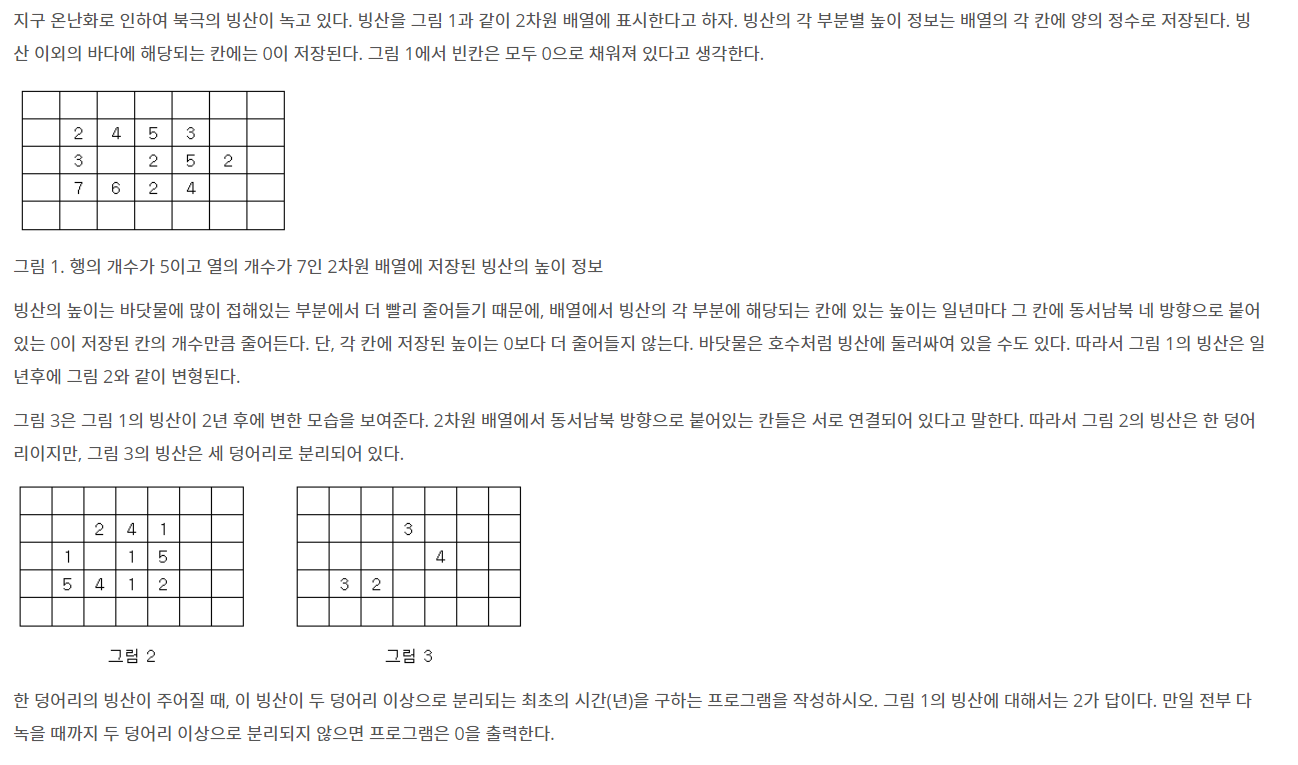

In [1]:
n, m = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(n)]
from collections import deque
import sys
pos = []
for i in range(n):
    for j in range(m):
        if graph[i][j] > 0:
            pos.append((i, j))
        else:
            graph[i][j] = -1
direction = [(1, 0), (-1, 0), (0, 1), (0, -1)]


def bfs(start, visit):
    queue = deque([start])
    next_queue = deque()
    while queue:
        y, x = queue.popleft()

        for dy, dx in direction:
            ny, nx = y + dy, x + dx

            if 0 <= ny < n and 0 <= nx < m and graph[ny][nx] > 0 and visit[ny][nx] == 0:
                queue.append((ny, nx))
                next_queue.append((ny, nx))
                visit[ny][nx] = 1

    return next_queue, visit

queue = deque(pos)
days = 0

def update(queue):
    q= deque()
    for y,x in queue:
        for dy, dx in direction:
            ny, nx = y + dy, x + dx

            if 0 <= ny < n and 0 <= nx < m and graph[ny][nx] == -1:
                graph[y][x] = graph[y][x] - 1 if graph[y][x] > 0 else 0

    while queue:
        y,x = queue.popleft()

        if graph[y][x] == 0:
            graph[y][x] = -1
        else:
            q.append((y,x))

    return q
while queue:
    next_queue = update(queue)
    queue = next_queue.copy()
    visit = [[0] * m for _ in range(n)]
    count = 0
    while next_queue and count < 2:
        y, x = next_queue.popleft()

        visit[y][x] = 1
        q, visit = bfs((y, x),visit)

        next_queue = deque(set(next_queue) - set(q))

        count += 1


    days += 1
    if count >= 2:
        print(days)
        sys.exit()
        break
print(0)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-7ad4b6a9c9a7>, line 7)